In [1]:
pip install pandas numpy scikit-learn seaborn matplotlib umap-learn


   Session_Duration  Pages_Visited  Bounce_Rate  Conversions  \
0        349.671415              4        43.02            0   
1        286.173570              7        87.50            0   
2        364.768854              7        30.15            0   
3        452.302986              2         9.46            0   
4        276.584663              5        75.84            0   

   Returning_Customer  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Session_Duration    1000 non-null   float64
 1   Pages_Visited       1000 non-null   int64  
 2   Bounce_Rate         1000 non-null   float64
 3   Conversions         1000 non-null   int64  
 4   Returning_Customer  1000 non-null   int64  
dtypes: float64(2), int

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


                Session_Duration  Pages_Visited  Bounce_Rate  Conversions  \
kmeans_cluster                                                              
0                     379.132049       5.095238    35.660000     0.058608   
1                     300.361716       4.937662    46.885974     0.158442   
2                     242.432113       4.950292    58.631023     0.187135   

                Returning_Customer  dbscan_cluster  hierarchical_cluster  
kmeans_cluster                                                            
0                         0.007326        1.084249              0.054945  
1                         1.000000        0.316883              1.800000  
2                         0.000000        1.374269              0.187135  


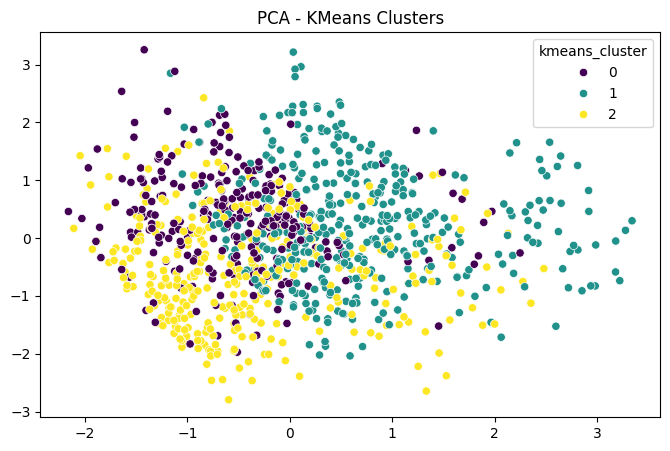

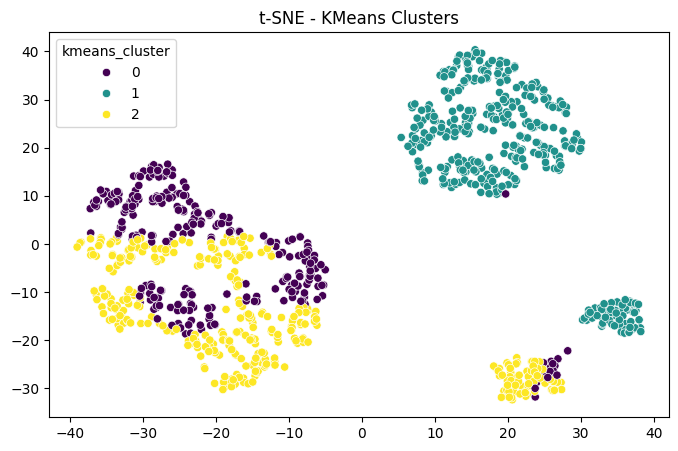

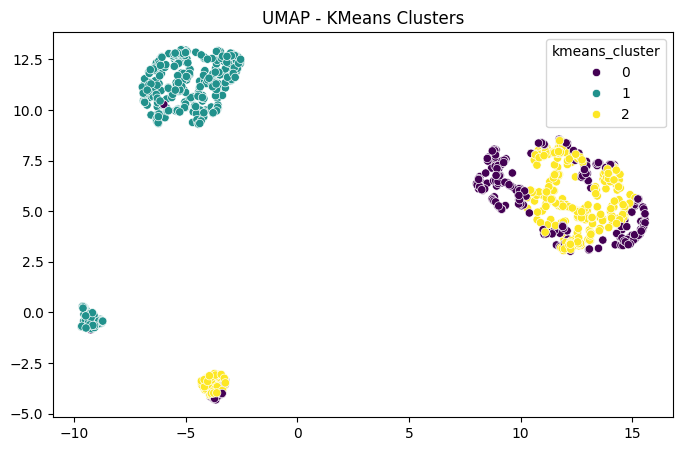


KMeans Cluster Profiles:
                Session_Duration  Pages_Visited  Bounce_Rate  Conversions  \
kmeans_cluster                                                              
0                     379.132049       5.095238    35.660000     0.058608   
1                     300.361716       4.937662    46.885974     0.158442   
2                     242.432113       4.950292    58.631023     0.187135   

                Returning_Customer  dbscan_cluster  hierarchical_cluster  
kmeans_cluster                                                            
0                         0.007326        1.084249              0.054945  
1                         1.000000        0.316883              1.800000  
2                         0.000000        1.374269              0.187135  


In [2]:
# 📚 Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 1. Data Collection (replace with your file path)
data = pd.read_csv('/content/customer_journey_data (1).csv')

# 📄 Display first few rows
print(data.head())
print(data.info())

# 📊 2. Data Preprocessing
# Handling missing values
data.fillna(data.mean(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)

# Convert categorical columns to numeric
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 📈 3. Feature Engineering Example (you can customize this)
# Assuming you have session_duration and pages_visited columns
if 'session_duration' in data.columns and 'pages_visited' in data.columns:
    data['interaction_rate'] = data['pages_visited'] / (data['session_duration'] + 1)

# 📉 4. Dimensionality Reduction

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# UMAP
reducer = umap.UMAP(random_state=42)
umap_result = reducer.fit_transform(scaled_data)

# 📊 5. Clustering

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['hierarchical_cluster'] = hierarchical.fit_predict(scaled_data)

# 📈 6. Cluster Profiling
cluster_profile = data.groupby('kmeans_cluster').mean()
print(cluster_profile)

# 📊 7. Visualization & Reporting

# PCA Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data['kmeans_cluster'], palette='viridis')
plt.title('PCA - KMeans Clusters')
plt.show()

# t-SNE Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=data['kmeans_cluster'], palette='viridis')
plt.title('t-SNE - KMeans Clusters')
plt.show()

# UMAP Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=data['kmeans_cluster'], palette='viridis')
plt.title('UMAP - KMeans Clusters')
plt.show()

# 📑 Final Cluster Profile Report
print("\nKMeans Cluster Profiles:")
print(cluster_profile)

# Save to CSV
cluster_profile.to_csv('cluster_profiles.csv')
